In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')
df.head()
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['tenure']= df['Date_of_Churn'] - df['Subscription_Start_Date']
df.head()
Gender_mapping = {"Female": 1, "Male": 2, "Other": 3}
df['Gender'] = df['Gender'].map(Gender_mapping)
df.head()
df.Location.value_counts()


Location_mapping = {"West": 1, "North": 2, "Central": 3, 'East': 4, 'South': 5}
df['Location'] = df['Location'].map(Location_mapping)
df.head()
Subscription_mapping = {"Premium": 1, "Standard": 2, "Basic": 3}
df['Subscription_Type'] = df['Subscription_Type'].map(Subscription_mapping)
df.head()
df.Payment_Method.value_counts()
Payment_mapping = {"Credit Card": 1, "Direct Debit": 2, "PayPal": 3}
df['Payment_Method'] = df['Payment_Method'].map(Payment_mapping)
df.head()

df.Payment_Method.value_counts()
df.Favorite_Genre.value_counts()

Genre_mapping = {"Drama": 1, "Action": 2, "Comedy ": 3, 'Sci-Fi': 4, 'Documentary': 5}
df['Favorite_Genre'] = df['Favorite_Genre'].map(Genre_mapping)
df.Favorite_Genre.value_counts()
df.Devices_Used. value_counts()
Devices_mapping = {"Mobile": 1, "Tablet": 2, "TV": 3, 'PC': 4}
df['Devices_Used'] = df['Devices_Used'].map(Devices_mapping)
df.Devices_Used. value_counts()

df.Reason_for_Churn.value_counts()

df['Reason_for_Churn'] = df['Reason_for_Churn'].fillna("unknown")
Reason_mapping = {"Price increase": 1, "Found better service": 2, "Personal reasons": 3, 'Dissatisfied with content': 4, "Unknown":5}
df['Reason_for_Churn'] = df['Reason_for_Churn'].map(Reason_mapping)


In [3]:
df.Reason_for_Churn. value_counts()

Reason_for_Churn
1.0    68
2.0    64
3.0    62
4.0    52
Name: count, dtype: int64

In [ ]:
#now all numerical and can corelate

In [34]:
df.tenure. value_counts()

tenure
35 days     4
201 days    4
98 days     3
274 days    3
107 days    3
           ..
301 days    1
316 days    1
51 days     1
63 days     1
36 days     1
Name: count, Length: 167, dtype: int64

In [32]:
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'datetime']).columns
correlation = df[numeric_columns].corr()['Churned'].sort_values(ascending=False)
print(correlation)

Churned                    1.000000
Date_of_Churn              0.999988
Favorite_Genre             0.046135
Location                   0.036632
Content_ID                 0.024253
Subscription_Type          0.013059
User_ID                    0.009620
Average_Session_Length     0.008055
Payment_Method             0.006789
Gender                    -0.001354
Monthly_Payment           -0.013059
Subscription_Start_Date   -0.034501
Age                       -0.045139
Monthly_Hours_Watched     -0.060233
Devices_Used              -0.138635
Rating_Given              -0.175378
Reason_for_Churn                NaN
Name: Churned, dtype: float64


<Axes: >

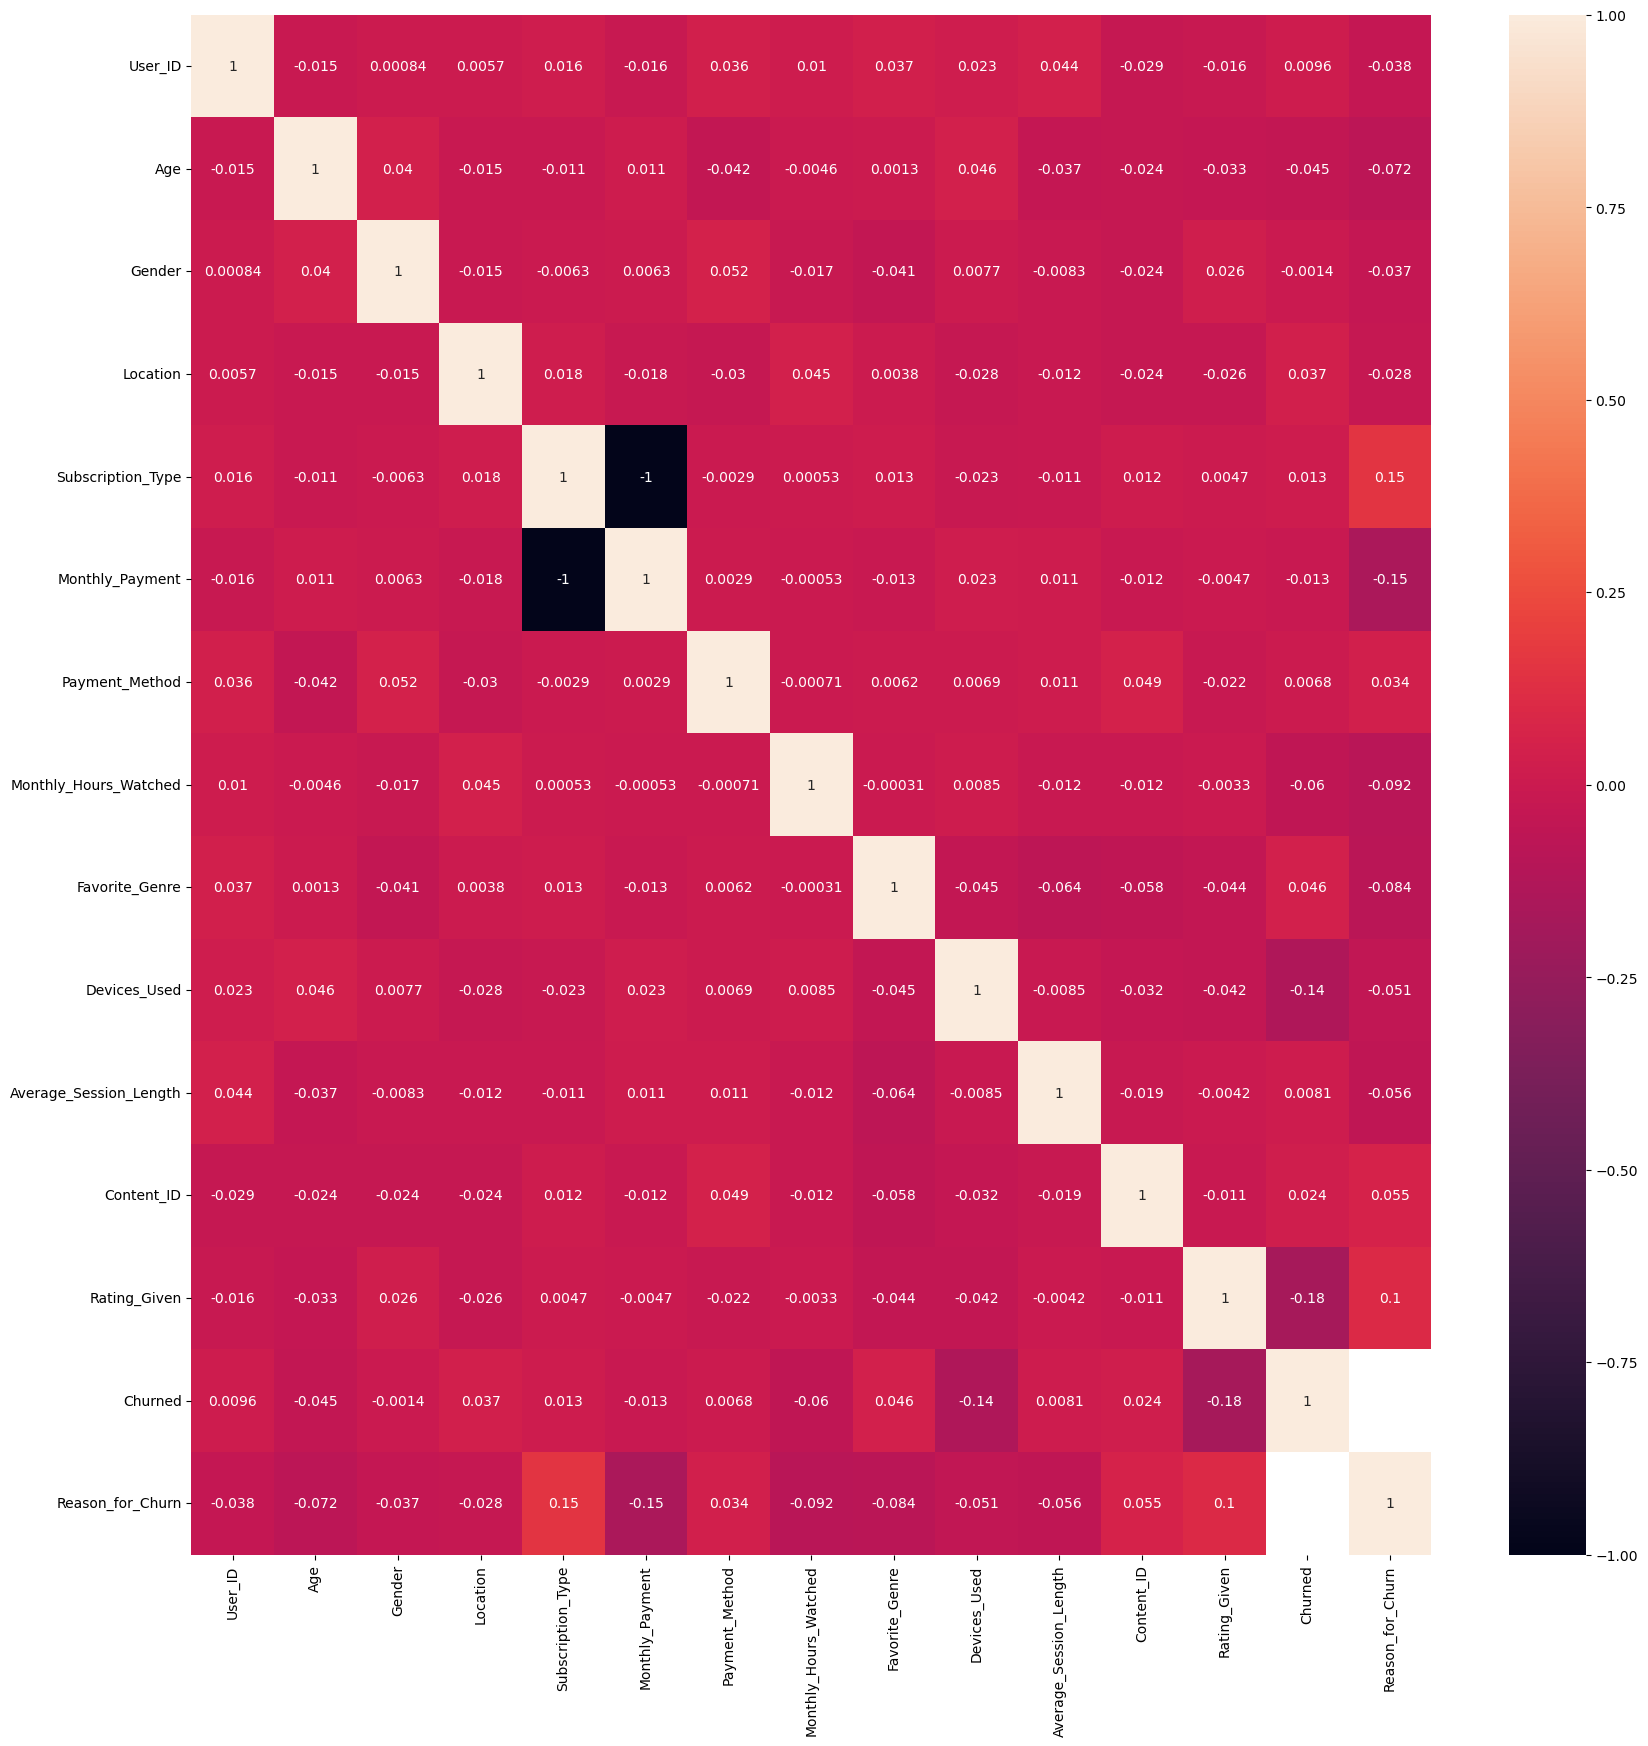

In [6]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize = (20,20))
sns.heatmap(df[numeric_columns].corr(), annot=True)

<Axes: xlabel='Reason_for_Churn', ylabel='Rating_Given'>

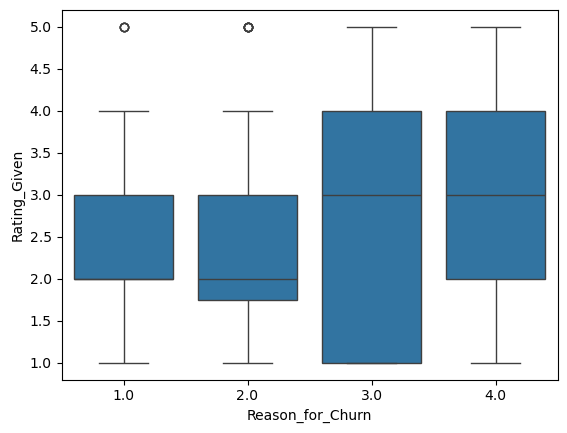

In [8]:
sns.boxplot(x=df['Reason_for_Churn'], y=df['Rating_Given'])

<Axes: xlabel='Reason_for_Churn', ylabel='Age'>

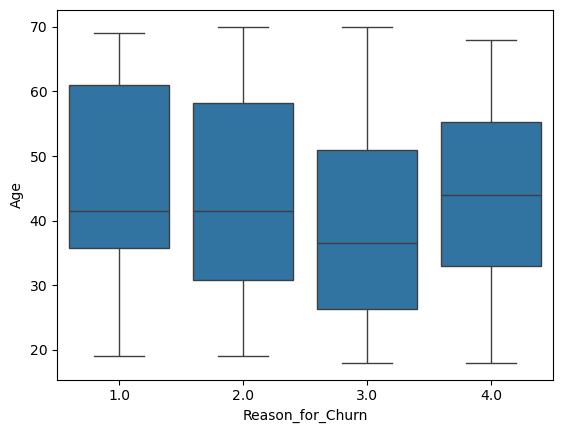

In [12]:
sns.boxplot(x=df['Reason_for_Churn'], y=df['Age'])

<Axes: xlabel='tenure', ylabel='Reason_for_Churn'>

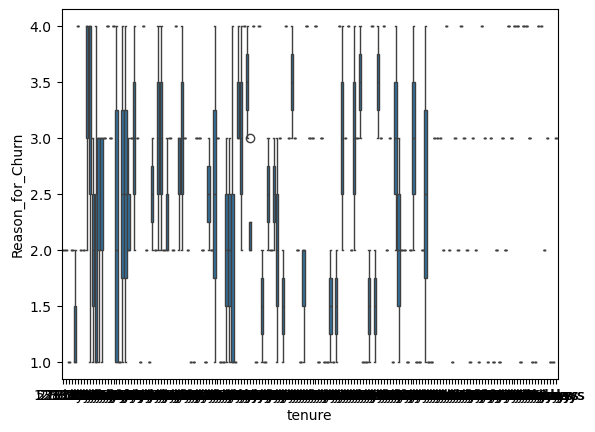

In [36]:
sns.boxplot(y=df['Reason_for_Churn'], x=df['tenure'])

<Axes: xlabel='Reason_for_Churn', ylabel='Gender'>

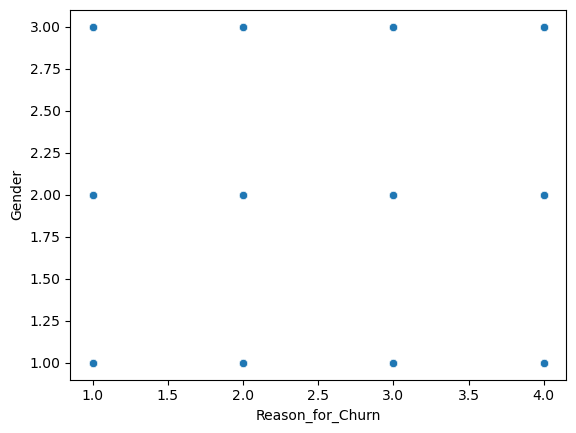

In [37]:
sns.scatterplot(x=df['Reason_for_Churn'], y=df['Gender'])

<Axes: xlabel='Reason_for_Churn', ylabel='Location'>

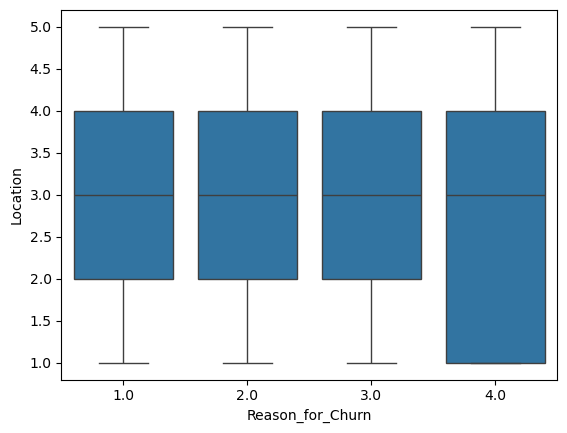

In [23]:
sns.boxplot(x=df['Reason_for_Churn'], y=df['Location'])

<Axes: xlabel='Subscription_Type', ylabel='Reason_for_Churn'>

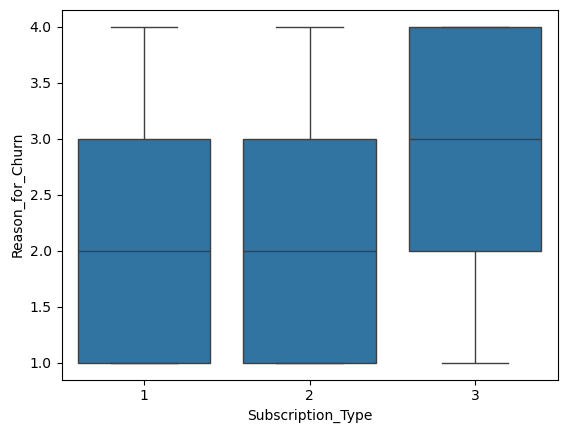

In [39]:
sns.boxplot(y=df['Reason_for_Churn'], x=df['Subscription_Type'])

In [25]:
df.Subscription_Type.value_counts()

Subscription_Type
2    530
3    276
1    194
Name: count, dtype: int64